# The Wholesale Customer Dataset

**Domain** This is a canonical dataset taken from the UCI Machine Learning Repository. 

It is data collected from the sale of products by a grocery wholesaler in Portugal. The values are in "monetary units".

**Problem** While this task includes labels, it is typically used for clustering or unsupervised learning work. Here we will keep the labels for comparison but will be exploring this dataset in the context of EDA and unsupervised learning in an EDA setting. 

Two columns will work as label for this set `region` and `channel`.

**Solution** We will be working toward a customer segmentation generated by a cluster analysis.

**Data** The following analysis shows:

- there are 440 rows and 8 useful variable columns in the dataset. Two of these columns are target features `Region` and `Channel`. 

- there are six integer value columns:
   - `Fresh`
   - `Milk`
   - `Grocery`
   - `Frozen`
   - `Detergents_Paper`
   - `Delicatessen`


**Benchmark** As this is an EDA and Unsupervised Learning task, we will not define an explicit benchmark. 

**Metrics** We will not define a metric for this project at this time. 

## Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

#### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

#### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

### Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
D = np.array([2, 11,  7, 19, 14,  9,  9,  4, 16, 12, 16, 18, 13, 16, 10, 13,  1, 6, 12,  2, 14, 14, 1, 1])
n = len(D)
n

24

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


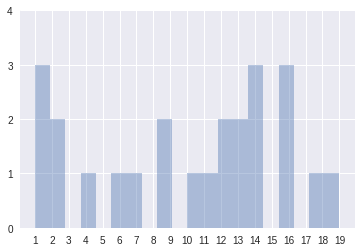

In [14]:
sns.distplot(D, bins=20, kde=False)
plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

In [4]:
mu = 1/(n)*np.sum(D)
mu

10.0

In [5]:
D.mean()

10.0

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


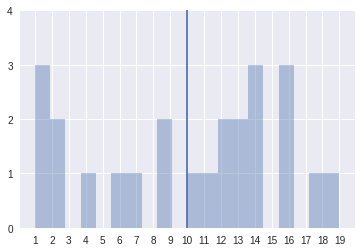

In [6]:
sns.distplot(D, bins=20, kde=False)
plt.axvline(D.mean())
plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

### Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [8]:
var = 1/n*np.sum((D-mu)**2)
var

31.75

In [9]:
D.var()

31.75

Note that the square root of the variance is the standard deviation.

In [10]:
np.sqrt(var)

5.634713834792322

In [15]:
#Example
E = np.array([1,1,1,3,5])
E.var()

2.5600000000000001

In [11]:
D.std()

5.634713834792322

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


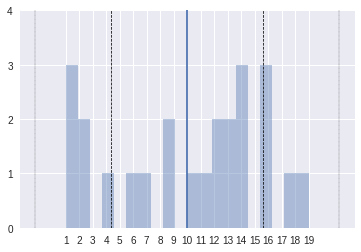

In [12]:
sns.distplot(D, bins=20, kde=False)
plt.axvline(D.mean()+D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()-D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()+2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean()-2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean())
plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

### Advanced Cases: Skew and Kurtosis

#### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [16]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

-0.31860989629428982

In [17]:
import scipy.stats as st

In [18]:
st.skew(D)

-0.31860989629428965

In [19]:
np.median(D)

11.5

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


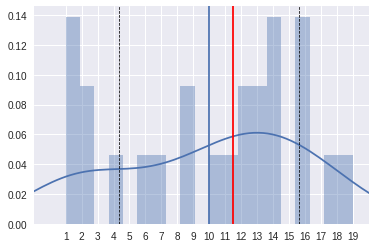

In [22]:
sns.distplot(D, bins=20, kde=True)
plt.axvline(D.mean()+D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()-D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()+2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean()-2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean())
plt.axvline(np.median(D), color="red")
plt.xlim(-1,20)
plt.xticks(list(range(1,20)));

In [16]:
from statsmodels.sandbox.distributions.extras import pdf_mvsk

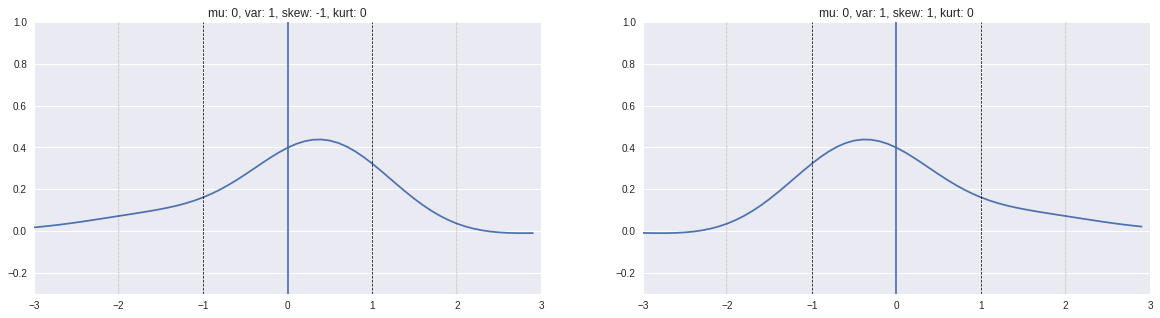

In [18]:
_, ax = plt.subplots(1,2,figsize=(20,5))

mvsk = [0,1,-1,0]
pdffunc = pdf_mvsk(mvsk)
rng = np.arange(-3, 3, 0.1)
ax[0].plot(rng, pdffunc(rng))
ax[0].axvline(1, color='black', lw=.75, ls="dashed")
ax[0].axvline(-1, color='black', lw=.75, ls="dashed")
ax[0].axvline(2, color='black', lw=.25, ls="dashed")
ax[0].axvline(-2, color='black', lw=.25, ls="dashed")
ax[0].axvline(0)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-0.3, 1)
ax[0].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk))

mvsk = [0,1,1,0]
pdffunc = pdf_mvsk(mvsk)
ax[1].plot(rng, pdffunc(rng))
ax[1].axvline(1, color='black', lw=.75, ls="dashed")
ax[1].axvline(-1, color='black', lw=.75, ls="dashed")
ax[1].axvline(2, color='black', lw=.25, ls="dashed")
ax[1].axvline(-2, color='black', lw=.25, ls="dashed")
ax[1].axvline(0)
ax[1].set_xlim(-3,3)
ax[1].set_ylim(-0.3, 1)
ax[1].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk));



#### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

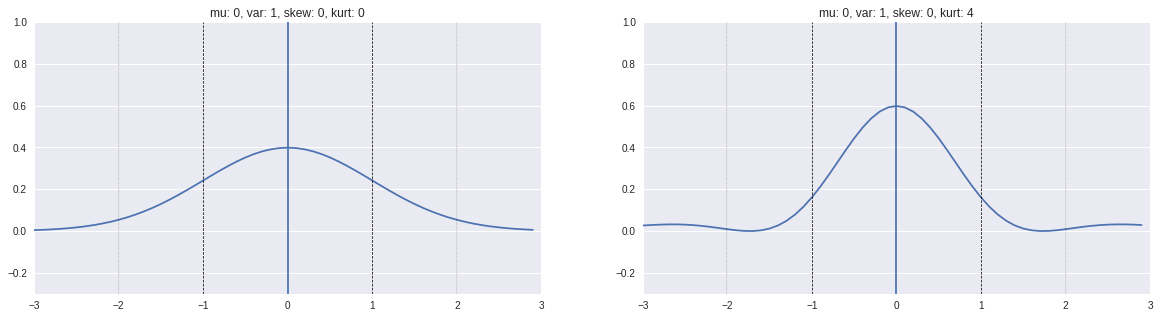

In [25]:
_, ax = plt.subplots(1,2,figsize=(20,5))

mvsk = [0,1,0,0]
pdffunc = pdf_mvsk(mvsk)
rng = np.arange(-3, 3, 0.1)
ax[0].plot(rng, pdffunc(rng))
ax[0].axvline(1, color='black', lw=.75, ls="dashed")
ax[0].axvline(-1, color='black', lw=.75, ls="dashed")
ax[0].axvline(2, color='black', lw=.25, ls="dashed")
ax[0].axvline(-2, color='black', lw=.25, ls="dashed")
ax[0].axvline(0)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-0.3, 1)
ax[0].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk))

mvsk = [0,1,0,4]
pdffunc = pdf_mvsk(mvsk)
ax[1].plot(rng, pdffunc(rng))
ax[1].axvline(1, color='black', lw=.75, ls="dashed")
ax[1].axvline(-1, color='black', lw=.75, ls="dashed")
ax[1].axvline(2, color='black', lw=.25, ls="dashed")
ax[1].axvline(-2, color='black', lw=.25, ls="dashed")
ax[1].axvline(0)
ax[1].set_xlim(-3,3)
ax[1].set_ylim(-0.3, 1)
ax[1].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk));

#kurtosis, because it's the 4th power, anything less than one contributes very little to kurtosis. Measurement of outliers. 

In python:

In [26]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

1.8607477214954438

Kurtosis is the average (or expected value) of the standardized data raised to the fourth power. Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak."

In [27]:
st.kurtosis(D, fisher=False)

1.860747721495443

### Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 10.0, var: 31.75, skew: -0.31860989629428965, kurt: 1.860747721495443


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


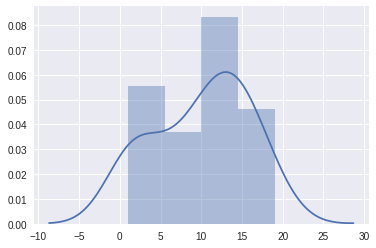

In [28]:
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.315, var: 36.795775000000006, skew: 0.08244453667483703, kurt: 1.6941896535477075


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


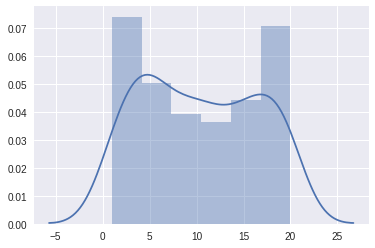

In [29]:
n = 200
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.5585, var: 34.276577749999994, skew: -0.012144503632325068, kurt: 1.784292188438209


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


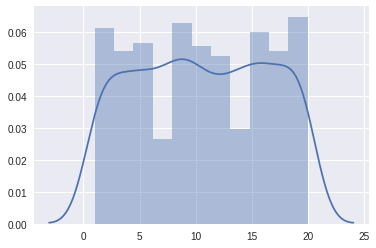

In [30]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.52765, var: 33.52583547750001, skew: -0.0028975778729431584, kurt: 1.7866647838019165


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


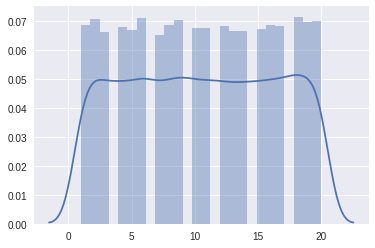

In [31]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.492515, var: 33.26776397477501, skew: 0.0018985929830533793, kurt: 1.7929241083763023


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


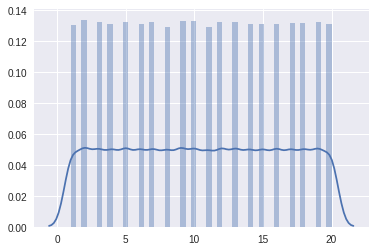

In [32]:
n = 200000
D = np.random.randint(1,21,n) # uniform distribution. 
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.50426, var: 33.2328558524, skew: -0.0008937021193806115, kurt: 1.7948979402454162


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


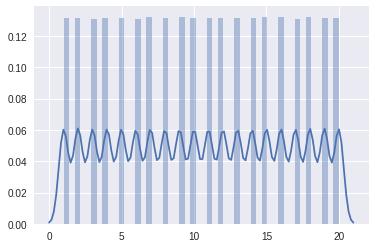

In [43]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

##### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

#### What about `randn`?

In [25]:
D = np.random.randn(10)
D

array([ 1.96007838, -1.92988049,  0.00941213,  0.66052634, -0.95757236,
       -0.08789187,  0.5019811 ,  0.62469503, -1.39275511, -2.24339836])

mu: 0.6285166750956241, var: 0.9989422992197738, skew: 0.35078747675084887, kurt: 3.2247114846414275


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([-1.3063561 ,  2.66561104,  0.72631811,  0.92738766,  0.37052132,
        0.11289781, -0.20347781, -1.06324839,  1.26770027,  2.81108538,
        1.59887974,  0.96981877,  0.32054326,  1.19152397,  0.38151505,
        0.20391562, -0.06311096,  0.38692963,  1.2188483 ,  0.05303081])

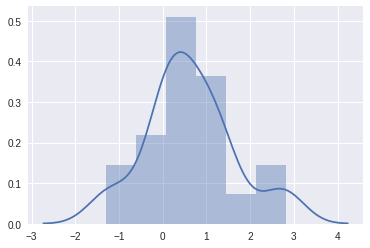

In [41]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.05797310889441415, var: 0.8740013052543254, skew: -0.17655700770003613, kurt: 2.7726589553911216


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


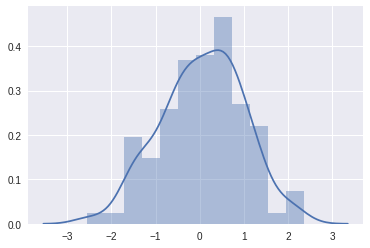

In [37]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.02988227319708475, var: 1.0340814907880294, skew: -0.03222334828932724, kurt: 2.8753433694096815


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


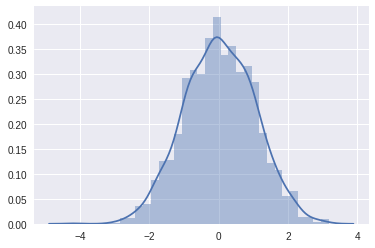

In [38]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.007293505105415743, var: 0.9998100312451468, skew: -0.007403859928514821, kurt: 3.0292402596075814


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


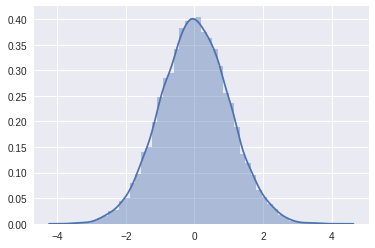

In [39]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 1.7864186496350953e-06, var: 0.993786685245619, skew: -0.008788020158552444, kurt: 2.994587285182079


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


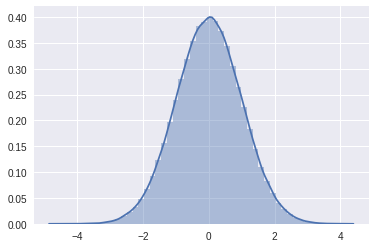

In [40]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

## Preliminary EDA

In [2]:
#We are interested in how many money they are selling.
customers <- read.table('data/Wholesale_customers_data.csv', sep=",", header = T)

In [3]:
head(customers)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [4]:
dim(customers); str(customers)

[1] 440   8

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicatessen    : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [5]:
customers$Channel = factor(customers$Channel)
customers$Region = factor(customers$Region)

In [12]:
str(customers)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicatessen    : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [13]:
cust_sum = summary(customers)
cust_sum

 Channel Region      Fresh             Milk          Grocery     
 1:298   1: 77   Min.   :     3   Min.   :   55   Min.   :    3  
 2:142   2: 47   1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153  
         3:316   Median :  8504   Median : 3627   Median : 4756  
                 Mean   : 12000   Mean   : 5796   Mean   : 7951  
                 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656  
                 Max.   :112151   Max.   :73498   Max.   :92780  
     Frozen        Detergents_Paper   Delicatessen    
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [14]:
table(customers$Channel, customers$Region)

   
      1   2   3
  1  59  28 211
  2  18  19 105

In [15]:
customer_features = Filter(is.numeric, customers)
head(customer_features)
str(customer_features)

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
12669,9656,7561,214,2674,1338
7057,9810,9568,1762,3293,1776
6353,8808,7684,2405,3516,7844
13265,1196,4221,6404,507,1788
22615,5410,7198,3915,1777,5185
9413,8259,5126,666,1795,1451


'data.frame':	440 obs. of  6 variables:
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicatessen    : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [16]:
library(repr)
options(repr.plot.width=20, repr.plot.height=6)

In [17]:
sum_vals = data.frame(feature=colnames(customer_features))
sum_vals['mean_'] = sapply(customer_features, mean)
sum_vals['median_'] = sapply(customer_features, median)
sum_vals['sd_'] = sapply(customer_features, sd)
sum_vals
#mean of fresh is way bigger than anything else. Grocery is doubling. 

feature,mean_,median_,sd_
Fresh,12000.298,8504.0,12647.329
Milk,5796.266,3627.0,7380.377
Grocery,7951.277,4755.5,9503.163
Frozen,3071.932,1526.0,4854.673
Detergents_Paper,2881.493,816.5,4767.854
Delicatessen,1524.870,965.5,2820.106


In [18]:
library(reshape2)

In [19]:
melt(sum_vals)

Using feature as id variables


feature,variable,value
Fresh,mean_,12000.298
Milk,mean_,5796.266
Grocery,mean_,7951.277
Frozen,mean_,3071.932
Detergents_Paper,mean_,2881.493
Delicatessen,mean_,1524.870
Fresh,median_,8504.000
Milk,median_,3627.000
Grocery,median_,4755.500
Frozen,median_,1526.000


Using feature as id variables


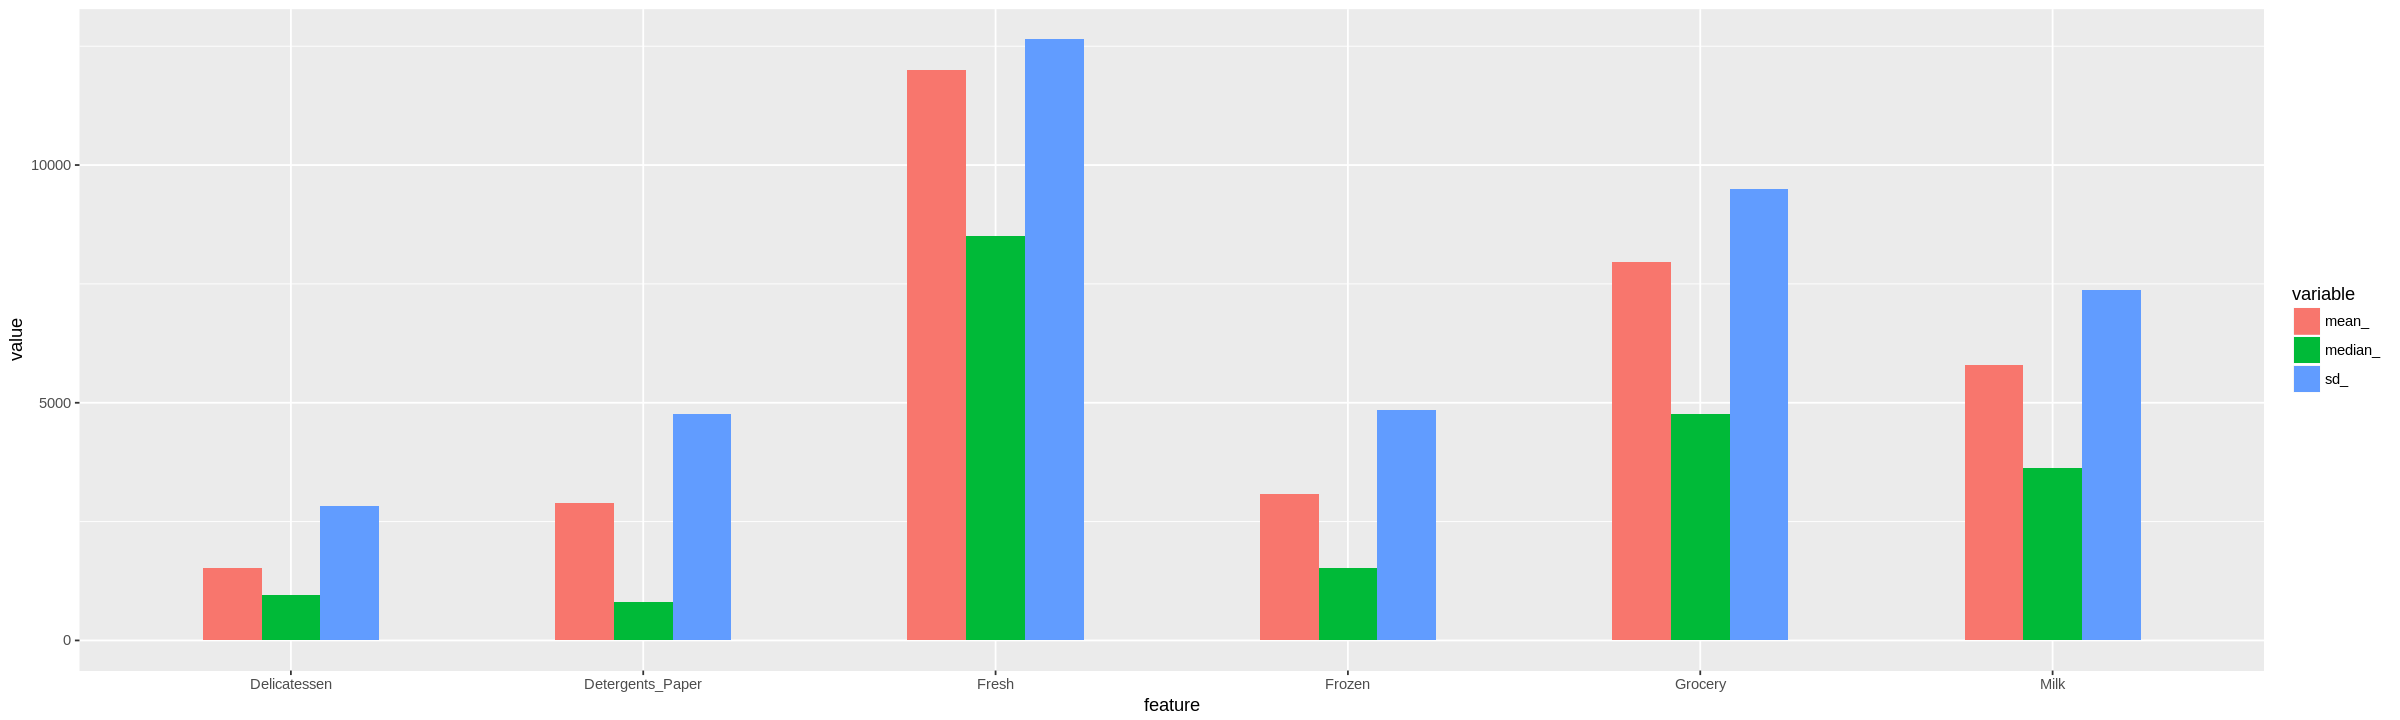

In [24]:
library(ggplot2)

ggplot(melt(sum_vals), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

## Sampling 

We can use the Survey Monkey [Sample Size Calculator](https://www.surveymonkey.com/mp/sample-size-calculator/) to consider what sample sizes we will need for our data to representative of the whole. 

#### Test 1 - `n = 5`

In [19]:
sum_vals = data.frame(feature=colnames(customer_features))
sum_vals['mean_'] = sapply(customer_features, mean)
sum_vals

feature,mean_
Fresh,12000.298
Milk,5796.266
Grocery,7951.277
Frozen,3071.932
Detergents_Paper,2881.493
Delicatessen,1524.870


In [36]:
library(dplyr, warn.conflicts = FALSE)
samples = list()
for (i in 1:10) {
    samples[[i]] = sample_n(customer_features, 5)
}

samples[[1]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
228,4042,2204,1563,2286,263,689
276,680,1610,223,862,96,379
64,9396,11601,15775,2896,7677,1295
361,19746,2872,2006,2601,468,503
158,17773,1366,2474,3378,811,418


In [21]:
for (i in 1:10) {
    sum_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [22]:
sum_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
Fresh,12000.298,9956.6,21904.2,6414.0,12109.2,5415.4,12872.2,15521.6,6963.4,14005.4,9592.2
Milk,5796.266,4075.2,2996.0,3400.6,2291.2,8171.2,12030.2,2727.8,3312.4,6887.2,4967.2
Grocery,7951.277,5716.4,4283.0,7617.4,3143.4,13518.0,19434.6,6454.8,4561.8,10365.4,7286.0
Frozen,3071.932,1008.0,2130.6,3479.6,2250.6,1180.2,2525.2,2370.0,2587.0,1916.4,1889.6
Detergents_Paper,2881.493,2125.8,1049.6,3100.8,838.0,6584.2,7648.2,1989.2,1251.4,4002.6,2581.0
Delicatessen,1524.870,916.4,883.6,1918.8,788.0,2029.2,1365.4,488.4,1523.0,1471.0,1369.4


Using feature as id variables


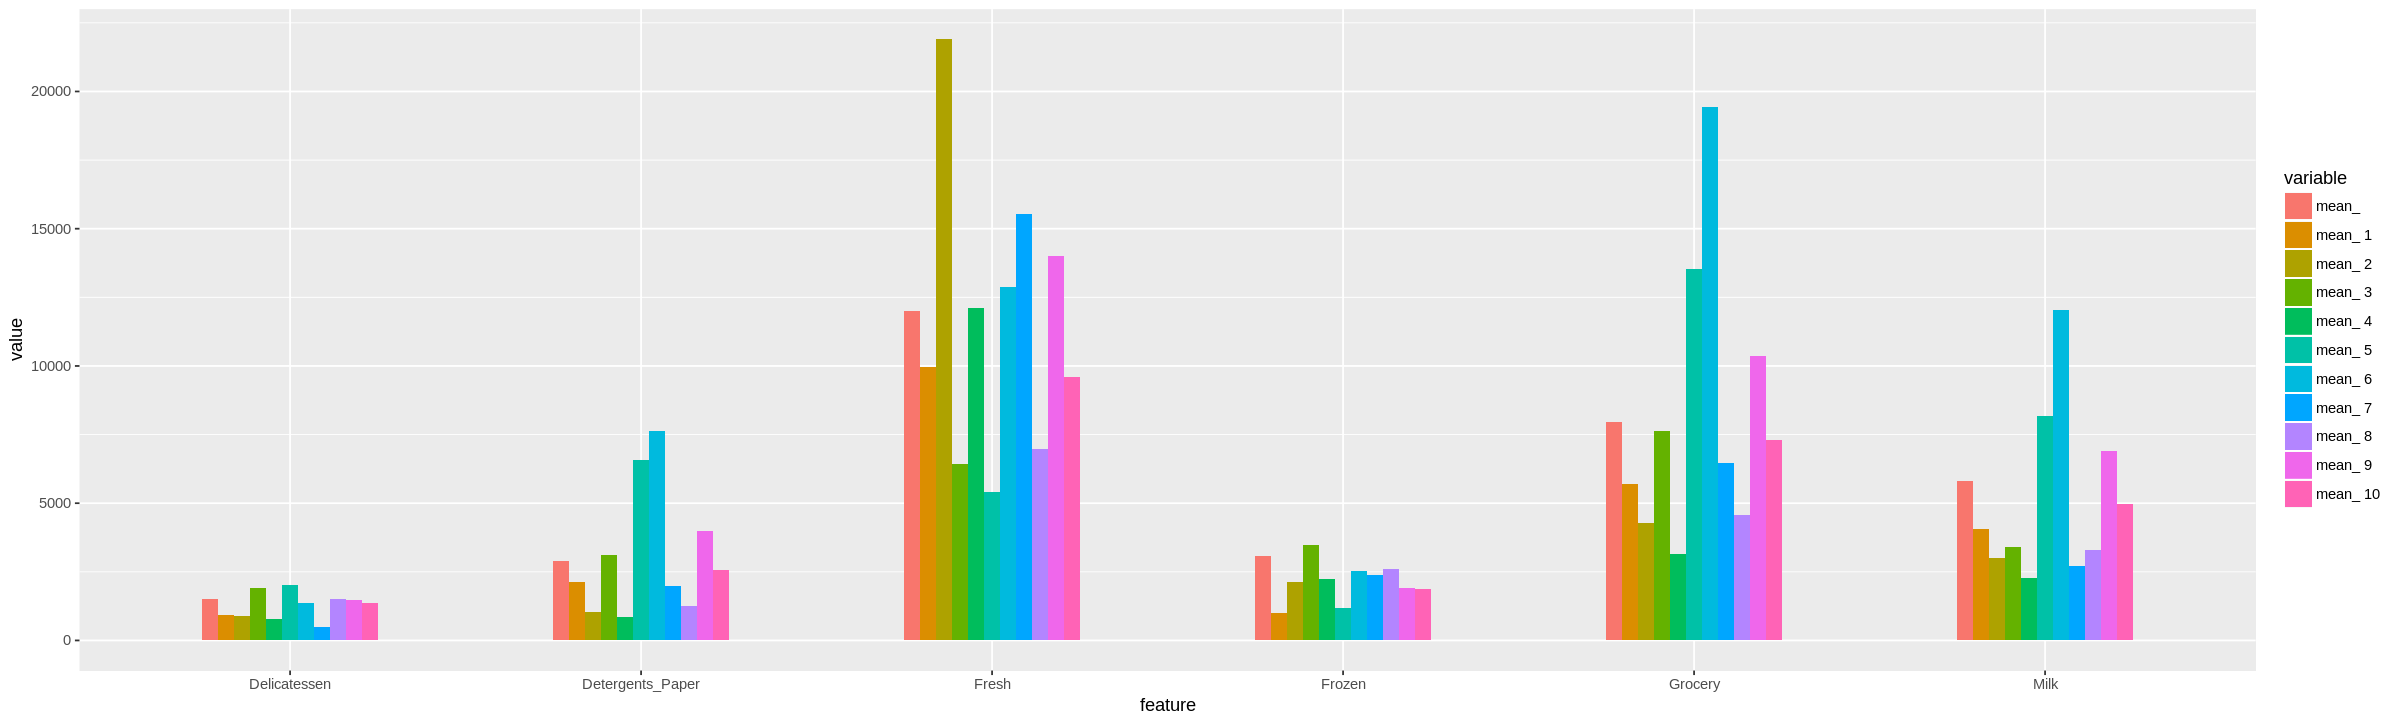

In [23]:
#high variance, we cannot generalize. 
library(reshape2)
library(ggplot2)

ggplot(melt(sum_vals), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

#### Test 2 - `n = 50`

In [24]:
sum_vals = data.frame(feature=colnames(customer_features))
sum_vals['mean_'] = sapply(customer_features, mean)
sum_vals

feature,mean_
Fresh,12000.298
Milk,5796.266
Grocery,7951.277
Frozen,3071.932
Detergents_Paper,2881.493
Delicatessen,1524.870


In [25]:
samples = list()
for (i in 1:10) {
    samples[[i]] = sample_n(customer_features, 50)
}

In [26]:
for (i in 1:10) {
    sum_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [27]:
sum_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
Fresh,12000.298,12066.30,10366.76,13581.78,12949.58,11503.46,11697.38,11980.24,11089.44,13759.14,11469.42
Milk,5796.266,6879.40,5571.38,7011.52,4731.14,8044.62,4984.50,7737.08,6711.48,5602.88,5727.90
Grocery,7951.277,6868.92,7112.94,9324.70,6756.24,10809.02,7070.40,9988.22,8428.90,6343.32,7966.56
Frozen,3071.932,4874.82,3481.56,3398.74,3855.08,2569.28,2847.30,3308.22,2706.14,4087.08,2840.96
Detergents_Paper,2881.493,2312.64,2565.64,3852.84,2315.72,4390.46,2678.92,4079.62,2979.86,1808.78,2911.18
Delicatessen,1524.870,2517.88,2174.18,1338.88,876.32,1622.02,1405.92,1366.76,1577.32,2205.98,1388.40


Using feature as id variables


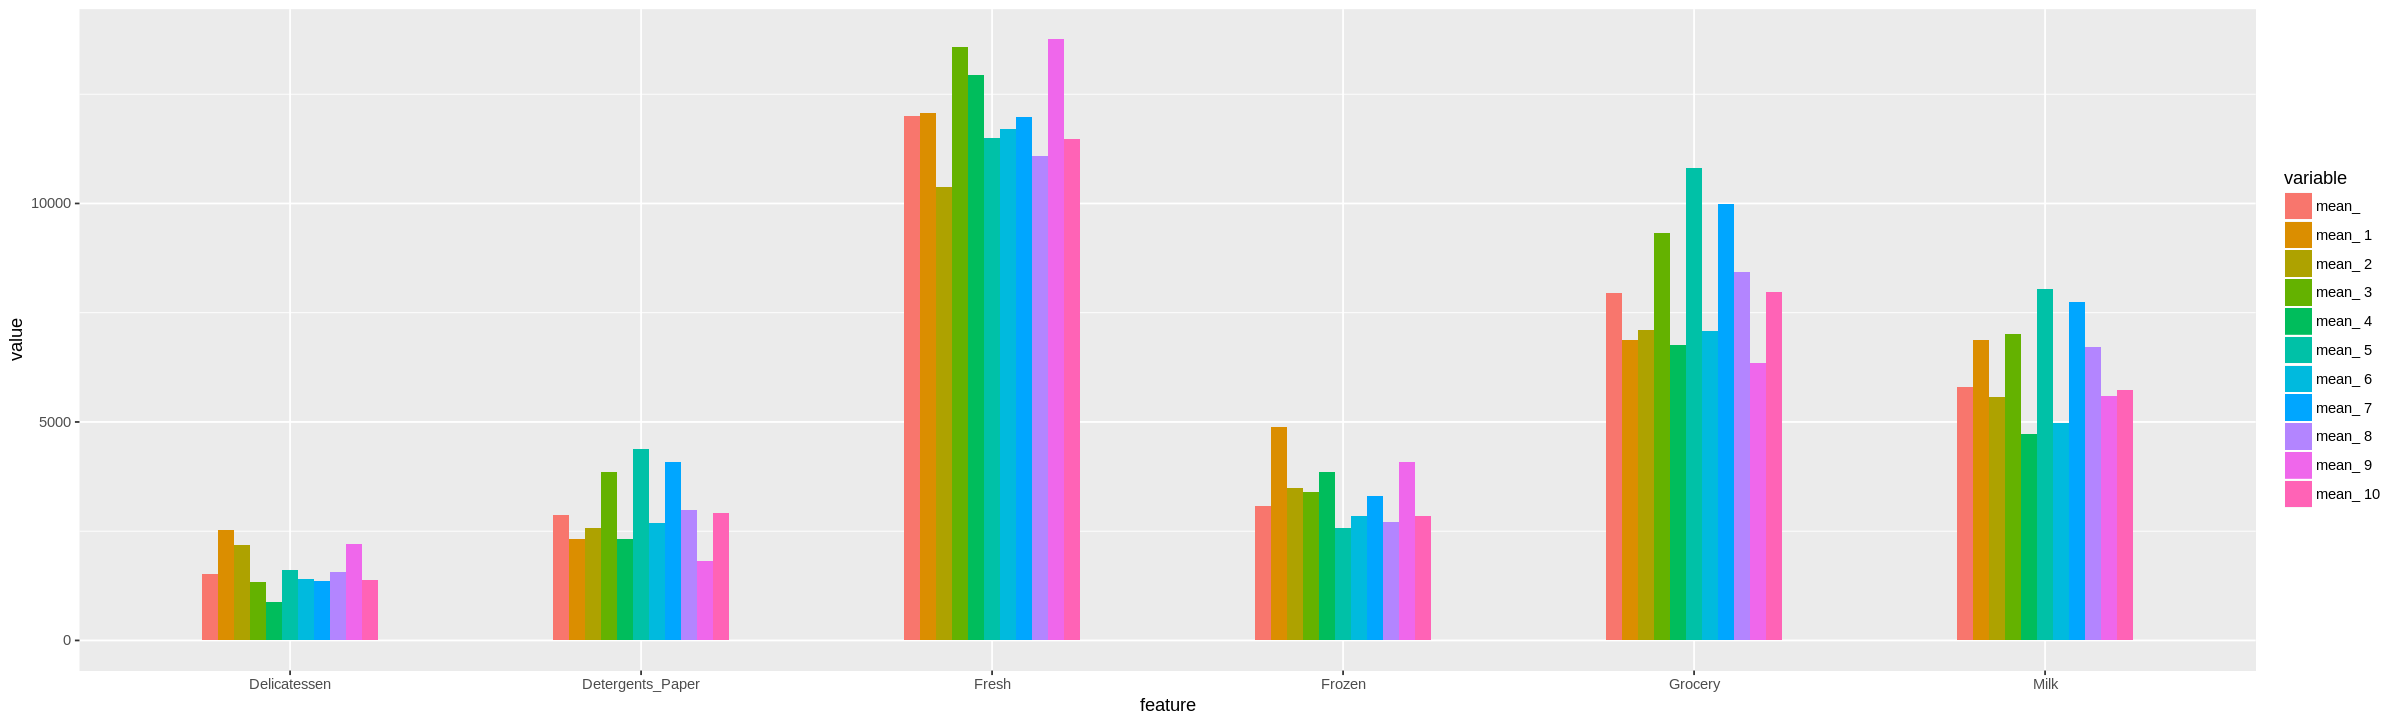

In [28]:
#sample 50 looks good to use. 
library(reshape2)
library(ggplot2)

ggplot(melt(sum_vals), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

#### Test 2 - `n = 150`

In [29]:
sum_vals = data.frame(feature=colnames(customer_features))
sum_vals['mean_'] = sapply(customer_features, mean)
sum_vals

feature,mean_
Fresh,12000.298
Milk,5796.266
Grocery,7951.277
Frozen,3071.932
Detergents_Paper,2881.493
Delicatessen,1524.870


In [30]:
samples = list()
for (i in 1:10) {
    samples[[i]] = sample_n(customer_features, 150)
}

In [31]:
for (i in 1:10) {
    sum_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [32]:
sum_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
Fresh,12000.298,10347.127,10534.260,11048.053,12428.987,11565.973,11751.787,10425.720,11389.720,10210.553,12505.513
Milk,5796.266,5716.600,6016.780,5335.627,5927.753,5307.233,4985.993,5832.160,5866.787,5661.467,5398.500
Grocery,7951.277,8260.973,7956.207,7908.067,8242.447,6952.753,6947.213,8119.240,8110.320,7177.933,7004.607
Frozen,3071.932,2814.600,2746.900,2875.387,3296.167,3045.600,2315.807,2846.833,2793.867,2658.053,3201.573
Detergents_Paper,2881.493,3134.313,2715.687,2936.407,2972.127,2435.387,2637.527,3199.887,3027.020,2707.173,2540.013
Delicatessen,1524.870,1837.487,1645.427,1407.320,1812.020,1376.600,1333.020,1746.387,1489.680,1773.240,1267.827


Using feature as id variables


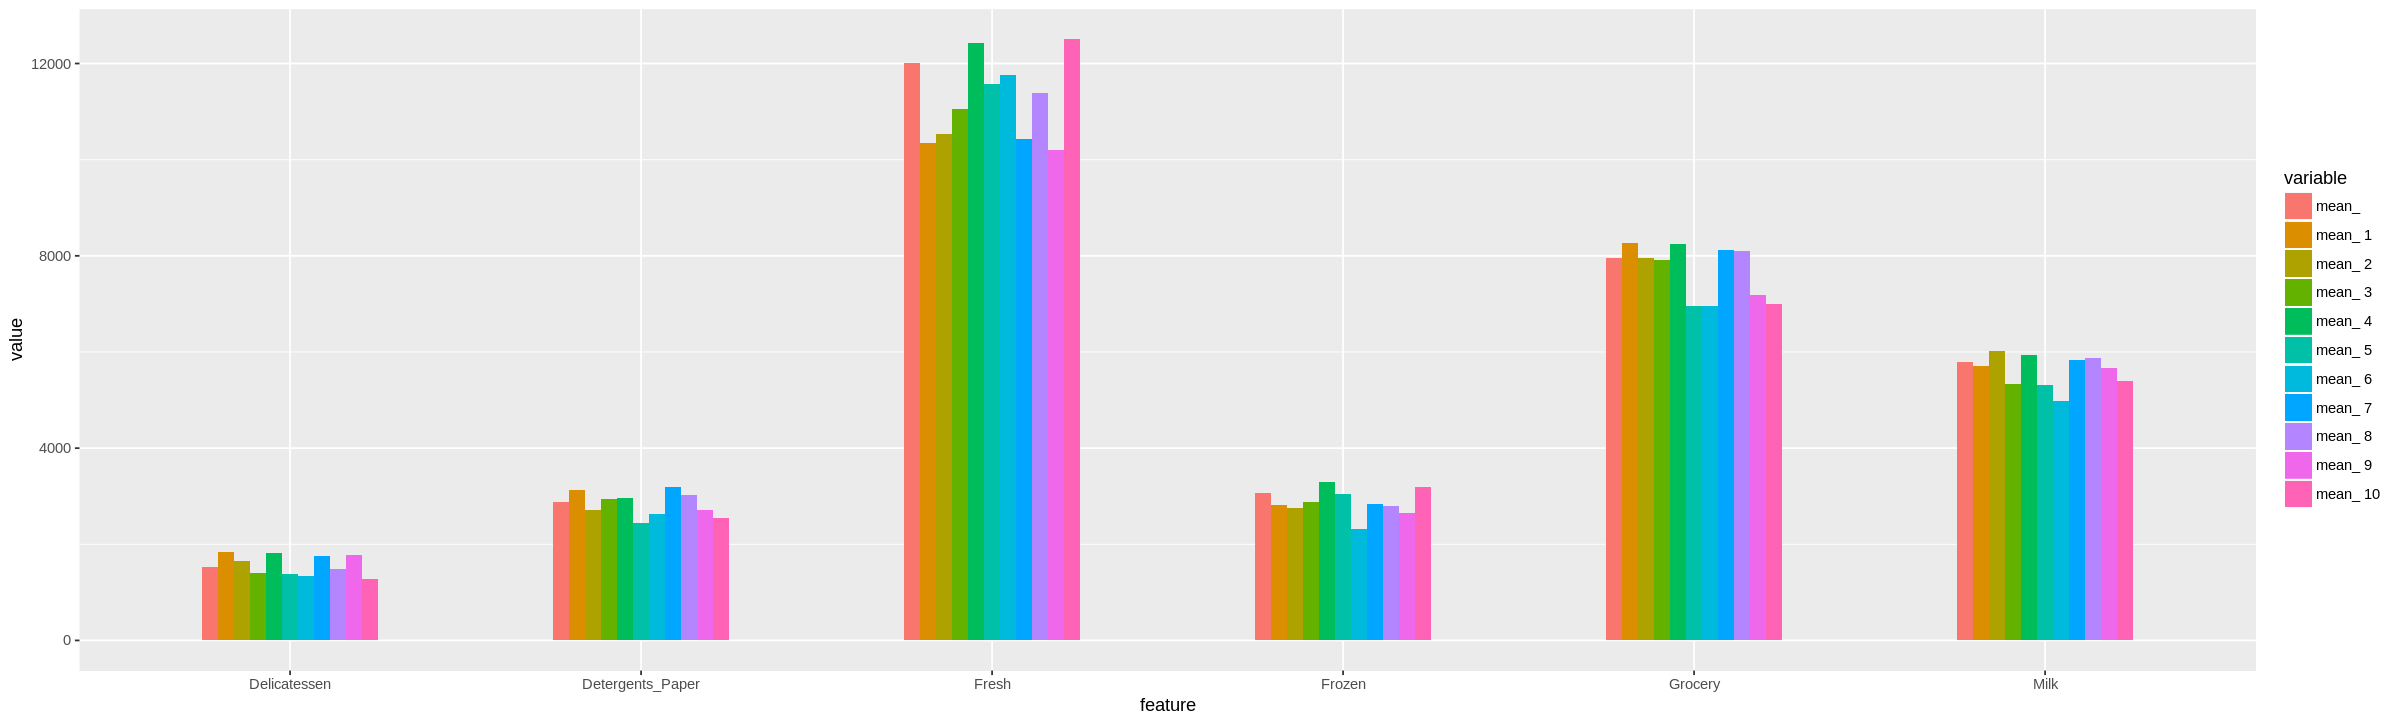

In [33]:
library(reshape2)
library(ggplot2)

ggplot(melt(sum_vals), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

## The Z-Score

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

In [3]:
customers = pd.read_csv('data/Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes([int])

display(customers.info())
display(customers.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.6 KB


None

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<a id='review-statistics-parameters'></a>

#### Review: Sample Statistics and Parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

### The Normal Distribution

---

The normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


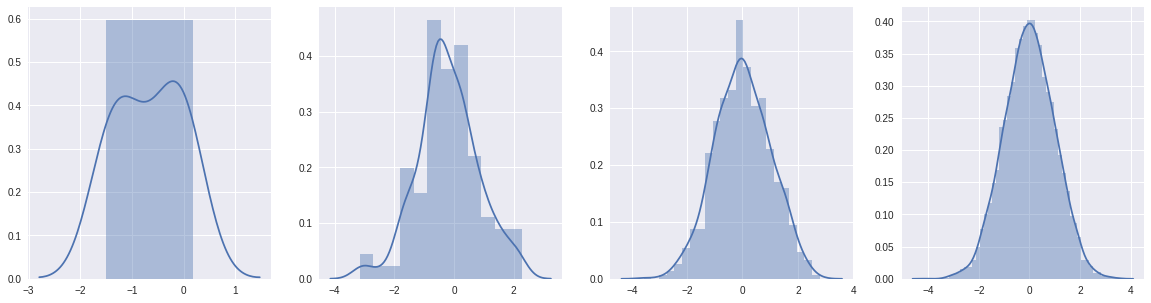

In [11]:
fig = plt.figure(figsize=(20,5))

for i in range(1,5):
    yy = np.random.normal(size=10**i)
    fig.add_subplot(1,4,i)
    sns.distplot(yy)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


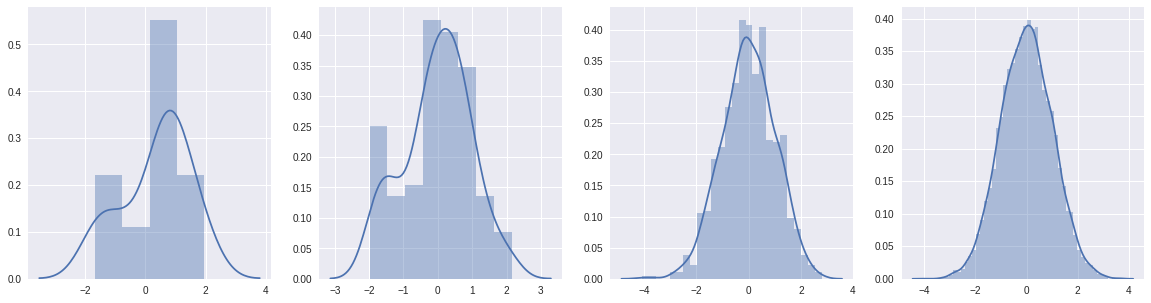

In [9]:
fig = plt.figure(figsize=(20,5))

for i in range(1,5):
    yy = np.random.randn(10**i)
    fig.add_subplot(1,4,i)
    sns.distplot(yy)

<a id='zdist-rule'></a>

#### The 68-95-99.7 Rule

---

It is often beneficial to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

**Below is a visual representation of the 68-95-99.7 rule on the Delicatessen distribution:**

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-5000, 20000)

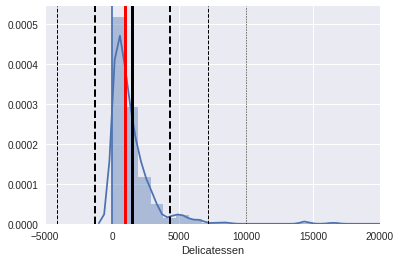

In [12]:
sns.distplot(customers.Delicatessen)
plt.axvline(customers.Delicatessen.mean(), color='black', lw=3)
plt.axvline(customers.Delicatessen.median(), color='red', lw=3)
plt.axvline((customers.Delicatessen.mean() - customers.Delicatessen.std()),
            color='black', lw=2, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + customers.Delicatessen.std()),
            color='black', lw=2, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + 2*customers.Delicatessen.std()),
            color='black', lw=1, ls="dashed")
plt.axvline((customers.Delicatessen.mean() - 2*customers.Delicatessen.std()),
            color='black', lw=1, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + 3*customers.Delicatessen.std()),
            color='black', lw=.5, ls="dashed")
plt.axvline((customers.Delicatessen.mean() - 3*customers.Delicatessen.std()),
            color='black', lw=.5, ls="dashed")
plt.axvline(0)
plt.xlim(-5000,20000)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


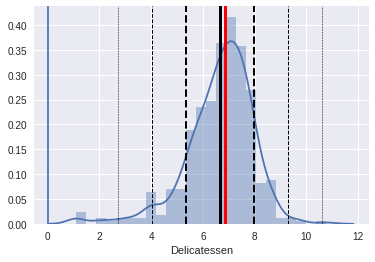

In [227]:
#log customers.Delicatessen. Not assuming your data is normal. 
sns.distplot(np.log(customers.Delicatessen))
plt.axvline(np.log(customers.Delicatessen).mean(), color='black', lw=3)
plt.axvline(np.log(customers.Delicatessen).median(), color='red', lw=3)
plt.axvline((np.log(customers.Delicatessen).mean() - np.log(customers.Delicatessen).std()),
            color='black', lw=2, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + np.log(customers.Delicatessen).std()),
            color='black', lw=2, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + 2*np.log(customers.Delicatessen).std()),
            color='black', lw=1, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() - 2*np.log(customers.Delicatessen).std()),
            color='black', lw=1, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + 3*np.log(customers.Delicatessen).std()),
            color='black', lw=.5, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() - 3*np.log(customers.Delicatessen).std()),
            color='black', lw=.5, ls="dashed")
plt.axvline(0)

### Definition: z-score


The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:

#### $$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$


In [14]:
#customer features is a dataframe with 6 vectors (6 columns). customer_features.mean() is a vector. 
customer_feature_z_scores = (customer_features - customer_features.mean())/customer_features.std()
customer_feature_z_scores

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
5,-0.204573,0.333687,-0.297299,-0.495591,-0.227879,-0.026194
6,0.009939,-0.351915,-0.102732,-0.533904,0.054219,-0.347459
7,-0.349584,-0.113851,0.155182,-0.288986,0.092181,0.369181
8,-0.477358,-0.291078,-0.185125,-0.545234,-0.244448,-0.274766
9,-0.473958,0.717678,1.150114,-0.394039,0.952946,0.203230


In [228]:
np.random.seed(42)
sample = customer_feature_z_scores.sample(4)
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,-0.481627,2.402416,0.604822,1.459021,-0.430276,0.748599
78,-0.097594,-0.626156,-0.619191,-0.201029,-0.541227,-0.481496
347,1.216044,0.188030,0.458765,-0.054161,0.364841,-0.178316
255,1.550818,-0.719105,-0.679382,0.035032,-0.581078,-0.322637


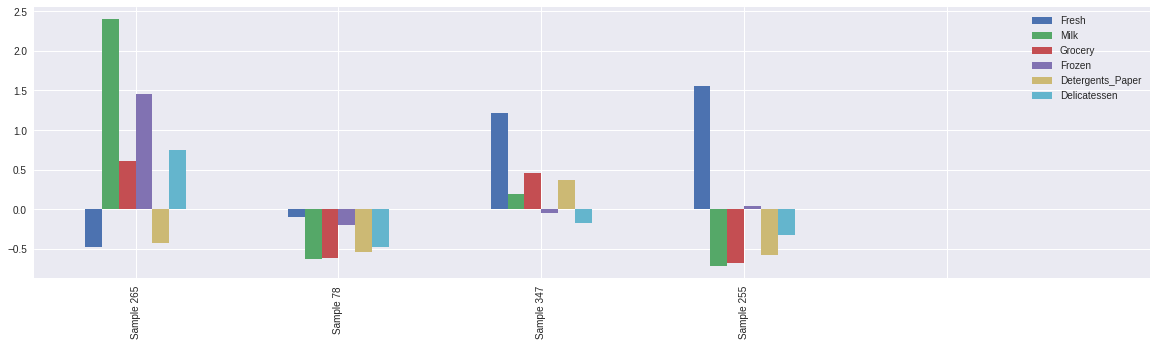

In [229]:
sample.plot(kind='bar', figsize=(20,5))
labels = ["Sample {}".format(i) for i in sample.index]
plt.xticks(range(sample.shape[0]+2),labels);

## Central Limit Theorem

---

Normality underlies many of the inferential techniques that we use in data science.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_1$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X ~ N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='additional-resources'></a>

#### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2


In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

In [35]:
from scipy.stats import skew
import scipy.stats as st

In [44]:
display(customer_features.head())
display(st.skew(customer_features))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([  2.55258269,   4.03992212,   3.57518722,   5.88782573,
         3.61945758,  11.11353365])

In [31]:
skew(customer_features)

array([  2.55258269,   4.03992212,   3.57518722,   5.88782573,
         3.61945758,  11.11353365])

In [37]:
import random 

random.sample(range(10), 2)

[5, 3]

In [39]:
customer_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [38]:
stats = customer_features.describe().T
stats['skew'] = skew(customer_features)
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


### Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [246]:
np.random.seed(42)

In [247]:
sample = customer_features.sample(3)

In [248]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


In [249]:
sample_stats = sample.describe().T
sample_stats["skew"] = st.skew(sample)
sample_stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,3.0,14685.000000,11259.213161,5909.0,8337.5,10766.0,19073.0,27380.0,0.561975
Milk,3.0,10628.666667,11567.293215,1175.0,4179.5,7184.0,15355.5,23527.0,0.498566
Grocery,3.0,9359.000000,6353.076735,2067.0,7189.0,12311.0,13005.0,13699.0,-0.669325
Frozen,3.0,5020.000000,4461.307095,2096.0,2452.5,2809.0,6482.0,10155.0,0.686842
Detergents_Paper,3.0,1917.333333,2356.336210,301.0,565.5,830.0,2725.5,4621.0,0.667224
Delicatessen,3.0,1608.333333,1807.299182,167.0,594.5,1022.0,2329.0,3636.0,0.533276


In [250]:
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


### Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [45]:
sample_1pct_1 = customer_features.sample(5)

In [46]:
sample_1pct_1.mean()

Fresh               14123.6
Milk                 5801.0
Grocery              5475.8
Frozen               2812.6
Detergents_Paper     1097.8
Delicatessen         1987.6
dtype: float64

#### How does this compare to the actual mean?

In [47]:
sample_1pct_1.mean() - stats['mean']

Fresh               2123.302273
Milk                   4.734091
Grocery            -2475.477273
Frozen              -259.331818
Detergents_Paper   -1783.693182
Delicatessen         462.729545
dtype: float64

Let's think about this in terms of percent error.

In [48]:
(sample_1pct_1.mean() - stats['mean'])/stats['mean']

Fresh               0.176937
Milk                0.000817
Grocery            -0.311331
Frozen             -0.084420
Detergents_Paper   -0.619017
Delicatessen        0.303455
dtype: float64

#### How does it do?


The difference is relatively small as most of the products' percent error is close to or below 0. With the exception of Delicateseen at around 30 percent. This maybe a domain reason or we may need to increase the number of samples. 

#### Let's try it again

In [49]:
sample_1pct_2 = customer_features.sample(5)

In [50]:
sample_1pct_2.mean() - stats['mean']

Fresh              -2157.497727
Milk                 484.534091
Grocery             1619.922727
Frozen              -310.531818
Detergents_Paper     524.306818
Delicatessen          39.729545
dtype: float64

In [51]:
(sample_1pct_2.mean() - stats['mean'])/stats['mean']

Fresh              -0.179787
Milk                0.083594
Grocery             0.203731
Frozen             -0.101087
Detergents_Paper    0.181957
Delicatessen        0.026054
dtype: float64

#### How does it do?

The numbers are very different now as this is due to the reason of random sampling. An increase of samples may be necessary in this situation to get a more accurate result. 

#### Repeatedly Sample

Let's do it 10 times.

In [64]:
sample_means = []
for _ in range(10):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['mean']

Fresh              -0.121097
Milk               -0.165780
Grocery             0.007642
Frozen             -0.140183
Detergents_Paper    0.076921
Delicatessen       -0.057625
Name: mean, dtype: float64

In [63]:
display(sample_means)
display(sample_means.mean(axis=0))

array([[  2599.6,   4169.8,   7622.2,   1805.8,   3328. ,    589.8],
       [  6143.8,   4496.4,   6102. ,   2010.6,   1864. ,   1407.4],
       [ 18067.6,   2257.4,   3722.2,   4055.6,    453.8,    768.2],
       [ 29097.4,  18758.4,  13441. ,   9932.8,   2356. ,  13800.6],
       [ 15540.4,   3468. ,   5122.2,   5462.8,    723.6,    755. ],
       [ 12719. ,   7345.4,   8050.6,   8125.4,   1296.4,   2037.8],
       [ 13172.4,   5148.8,  10718. ,   3299.4,   5158.6,    490.2],
       [ 16556.6,   5179.8,   7054.6,   4195.8,   2378.6,   2410.2],
       [  7026.8,   2045.6,   4312.4,   2009.4,    698.6,    372. ],
       [  7139.8,   4183.4,   6687. ,   2560.4,   1777.8,    615. ]])

array([ 12806.34,   5705.3 ,   7283.22,   4345.8 ,   2003.54,   2324.62])

And 50 times.

In [233]:
sample_means = []
for _ in range(50):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['mean']

Fresh              -0.039893
Milk                0.045105
Grocery            -0.008141
Frozen              0.050478
Detergents_Paper    0.036288
Delicatessen       -0.082013
Name: mean, dtype: float64

And 100 times.

In [234]:
sample_means = []
for _ in range(100):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['mean']

Fresh              -0.047077
Milk               -0.037749
Grocery            -0.049915
Frozen              0.030467
Detergents_Paper   -0.103096
Delicatessen        0.093962
Name: mean, dtype: float64

#### What do we notice?

The numbers get closer to 0 when you increase the number of samples. 

#### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [68]:
sample_10pct_1 = customer_features.sample(44)
(sample_10pct_1.mean() - stats['mean'])/stats['mean']

Fresh              -0.060472
Milk               -0.123358
Grocery            -0.078370
Frozen              0.373566
Detergents_Paper   -0.094291
Delicatessen       -0.158543
dtype: float64

#### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

It is debatable as the rule of thumb is n = 30, but is not always the case. The numbers are not very close to 0 and most of the numbers are negative. However, the errors are low enough to get some accuracy from the distribution.

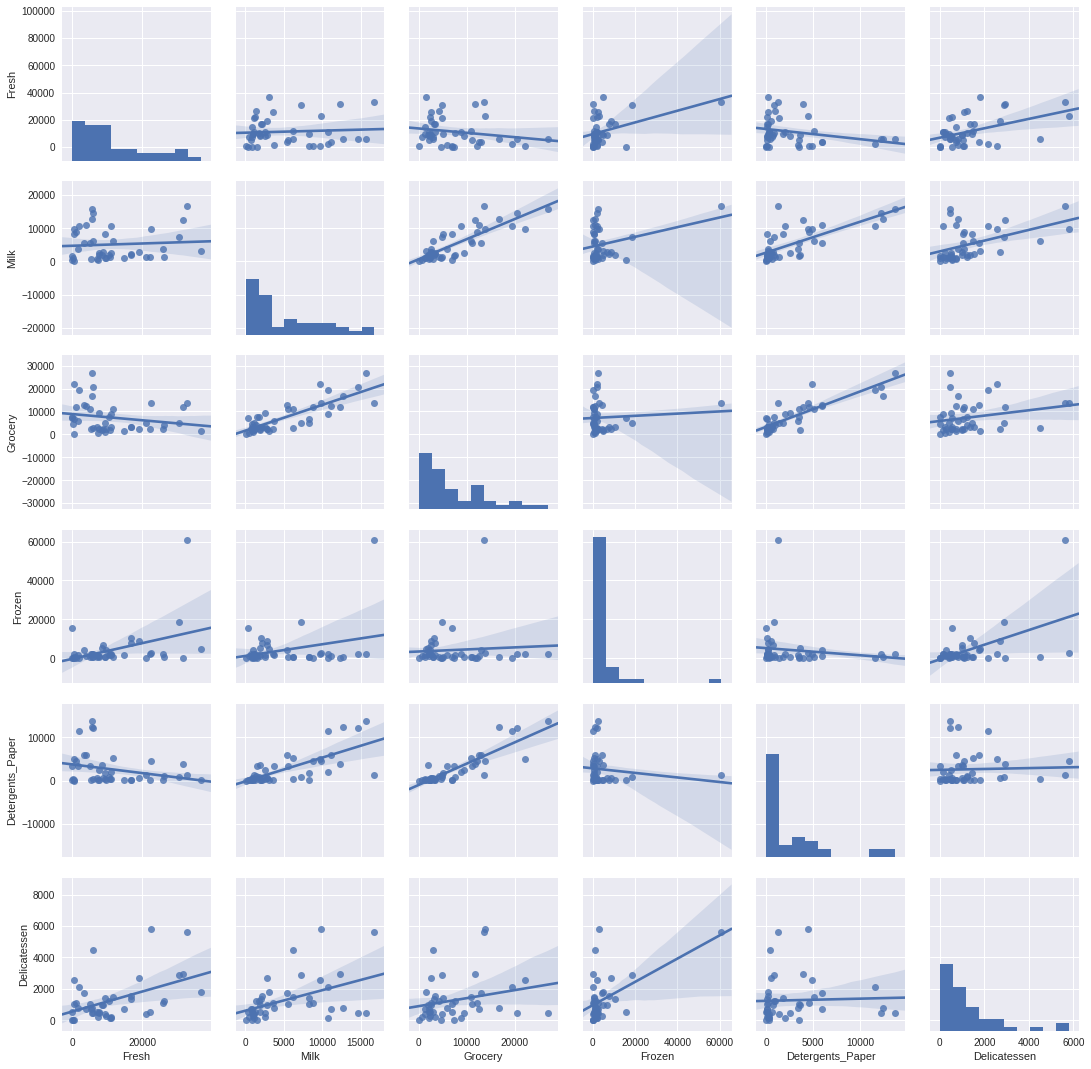

In [71]:
sns.pairplot(sample_10pct_1, kind='reg')

## Correlation and Redundancy

I claim that there is correlation and redundancy in the `customer` table. What I mean by this is that some features are linear combinations of other features. 

Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [73]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [74]:
#the other featuers can predict features. Decent model. 
calculate_r_2_for_feature(customer_features,'Detergents_Paper')

0.32699888904336794

In [75]:
#Measure of redundency. Delicateseen you can't remove. Detergents_paper and Grocery good, measure of redunduency which can remove. 
#People may buy detergents paper and Grocery together. 
print("{:24} {}".format("Delicatessen: ", calculate_r_2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Degergents_paper: ", calculate_r_2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", calculate_r_2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", calculate_r_2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", calculate_r_2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", calculate_r_2_for_feature(customer_features,'Milk')))

Delicatessen:            -9.182054310618254
Degergents_paper:        0.6849601687523378
Fresh:                   -0.49175437318294635
Frozen:                  -0.1959027782475422
Grocery:                 0.7194308110586232
Milk:                    0.3230281051470835


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [76]:
def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [77]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -2.881054793236032
Detergents_Paper:        0.6817672096602259
Fresh:                   -0.7533353388636431
Frozen:                  -1.5092479749644576
Grocery:                 0.6496655521730774
Milk:                    0.05780237708737464


In [78]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -3.162665027196596
Detergents_Paper:        0.6693131795785524
Fresh:                   -0.7396214965315221
Frozen:                  -1.4078129332313225
Grocery:                 0.6608948204386942
Milk:                    0.08980794450379966


##### Discussion

What does this tell us?

Detergents_paper, Grocery, and Milk are all considered to have relationship to the rest of the features. In essence we can remove these from the data after EDA. Features such as Delicatessen has a negative R^2, which means the feature is very unique and important to the data and cannot be removed from the data. 

### Visualize Redundancy

Study the correlation of the data.

4.651148557662964


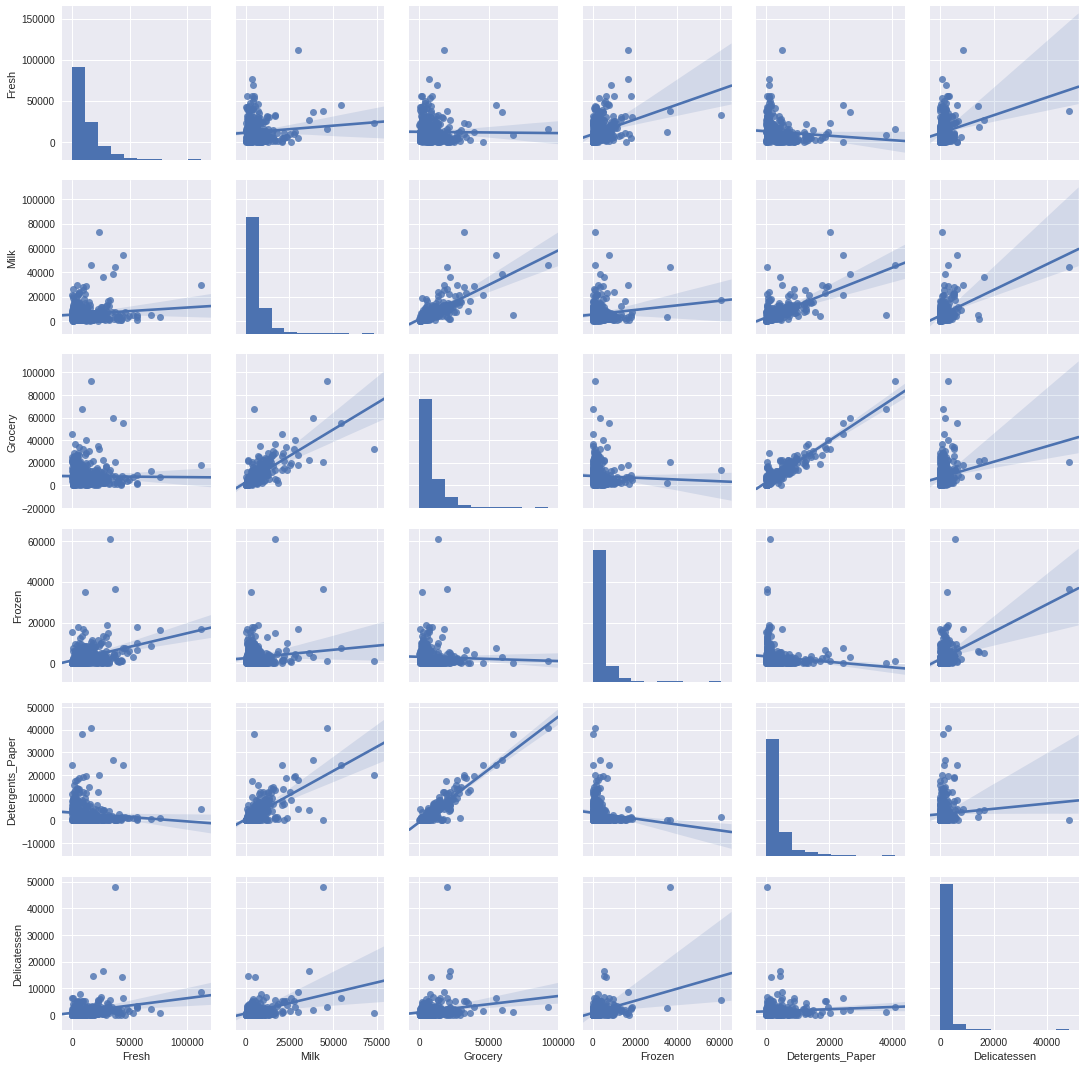

In [79]:
import time
start = time.time()
sns.pairplot(customer_features, kind='reg')
print(time.time() - start)

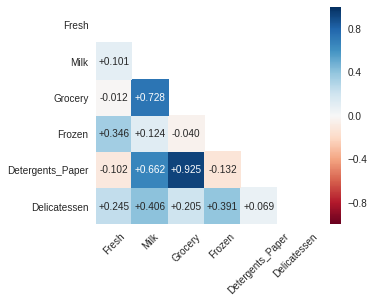

In [80]:
corr = customer_features.corr()
mask = np.zeros_like(corr)#don't want to see the values above. symmetric. 
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [81]:
whos DataFrame

Variable                    Type         Data/Info
--------------------------------------------------
corr                        DataFrame                         Fres<...>essen          1.000000  
customer_feature_z_scores   DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_features           DataFrame         Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
customers                   DataFrame        Channel Region  Fresh<...>n\n[440 rows x 8 columns]
sample                      DataFrame         Fresh   Milk  Grocer<...>       4621          1022
sample_10pct_1              DataFrame         Fresh   Milk  Grocer<...>        370          4478
sample_1pct_1               DataFrame         Fresh   Milk  Grocer<...>        343          2564
sample_1pct_2               DataFrame         Fresh   Milk  Grocer<...>       3459             3
stats                       DataFrame                      count  <...>25   47943.0  11.113534  


In [85]:
sample_1pct_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
298,6758,4560,9965,934,4538,1037
141,30379,13252,5189,321,51,1450
17,5876,6157,2933,839,370,4478
192,5509,1461,2251,547,187,409
240,22096,3575,7041,11422,343,2564


In [84]:
samp_stats = sample_1pct_1.describe().T
samp_stats['skew'] = st.skew(sample_1pct_1)
samp_stats['kurt'] = st.kurtosis(sample_1pct_1)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,5.0,14123.6,11448.618838,5509.0,5876.0,6758.0,22096.0,30379.0,0.596443,-1.418557
Milk,5.0,5801.0,4499.302557,1461.0,3575.0,4560.0,6157.0,13252.0,0.978980,-0.358596
Grocery,5.0,5475.8,3144.447042,2251.0,2933.0,5189.0,7041.0,9965.0,0.398298,-1.203249
Frozen,5.0,2812.6,4818.895548,321.0,547.0,839.0,934.0,11422.0,1.490493,0.237455
Detergents_Paper,5.0,1097.8,1927.416587,51.0,187.0,343.0,370.0,4538.0,1.483242,0.228105
Delicatessen,5.0,1987.6,1598.355499,409.0,1037.0,1450.0,2564.0,4478.0,0.731663,-0.812524


In [86]:
stats = customer_features.describe().T
stats['skew'] = st.skew(customer_features)
stats['kurt'] = st.kurtosis(customer_features)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


---

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

You are already familiar with standardization.

$$Z = \frac{X-\mu}{\sigma}$$

In [87]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler = StandardScaler()
customer_sc = scaler.fit_transform(customer_features)
customer_sc_df = pd.DataFrame(customer_sc, columns=customer_features.columns)

sc_stats = customer_features.describe().T
sc_stats['skew'] = st.skew(customer_features)
sc_stats['kurt'] = st.kurtosis(customer_features)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


### Visualizing Data Transformation

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


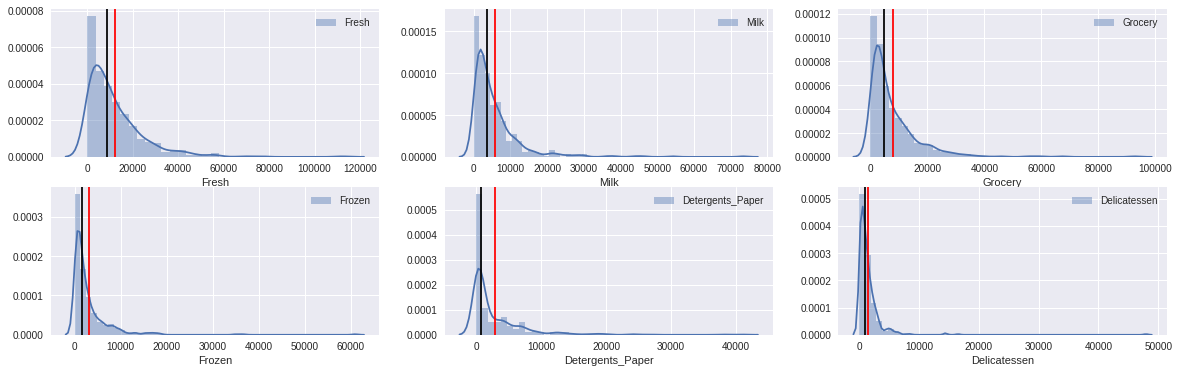

In [102]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_features.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_features[col], label=col)
    plt.axvline(customer_features[col].mean(), c='red')
    plt.axvline(customer_features[col].median(), c='black')
    plt.legend()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


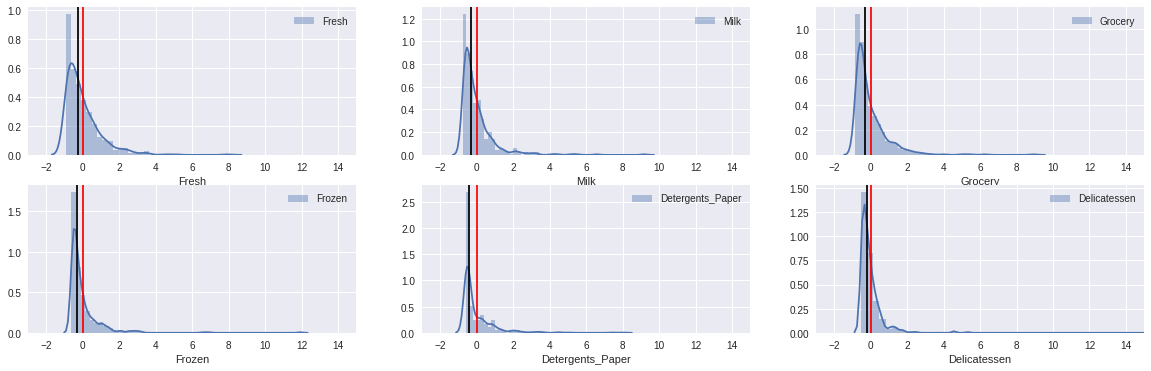

In [241]:
#shape is the same, but the scale has changed. Does not change the distribution of the data. 
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()
    plt.xlim(-3,15)

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

## Deskew the Data

We will look at two common approaches to deskewing data:

- the log transform
- scaling by the Box-Cox test

For purposes of comparison, we will keep both transforms.

We have previously looked at scaling data as a preprocessing step. Note that scaling of data will have no effect on its skewness. 

Another way we can verify this is via a test of skewness.

To perform this test we can use the `scipy.stats.skewtest`.

This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution. Remember, a low p-value means reject the null hypothesis i.e the data is skewed!


In [104]:
import scipy.stats as st

In [105]:
#pvalue is low, reject null hypothesis. The model is skewed. 
for col in customer_sc_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    print("{}\norig skew test: {} \nscaled skew test: {}\n\n".format(col, 
                                                                     original_col_skewtest,
                                                                     scaled_col_skewtest))

Fresh
orig skew test: SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
scaled skew test: SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41)


Milk
orig skew test: SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
scaled skew test: SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62)


Grocery
orig skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
scaled skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)


Frozen
orig skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83) 
scaled skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83)


Detergents_Paper
orig skew test: SkewtestResult(statistic=15.815137437204189, pvalue=2.4467517316177991e-56) 
scaled skew test: SkewtestResult(statistic=15.815137437204189, pvalue=2.4467517316177991e-56)


Delicatessen
o

### Deskew by taking the log of the data

Many times the skew of data can be easily removed by taking the log of the data. Let's do so here.

We will then scale the data after deskewing.

In [242]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
minmax_scaler = MinMaxScaler(max(customer_features.max()))
minmax_scaler.fit_transform(customer_features)

IndexError: invalid index to scalar variable.

In [108]:
#Take the log then scaled it. You can't log 0 and negative numbers. Here we don't log the scaled customer features model. 
customer_log_df = np.log(customer_features)

scaler.fit(customer_log_df)
customer_log_sc = scaler.transform(customer_log_df)
customer_log_sc_df = pd.DataFrame(customer_log_sc, columns=customer_features.columns)
customer_log_sc_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [109]:
#same concept
customer_log_df = np.log(customer_features)

customer_log_sc = scaler.fit_transform(customer_log_df)
customer_log_sc_df = pd.DataFrame(customer_log_sc, columns=customer_features.columns)
customer_log_sc_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [110]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

Fresh
    orig:       SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:     SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41)
    orig log:   SkewtestResult(statistic=-10.321752441398017, pvalue=5.6188111433575958e-25)
    scaled log: SkewtestResult(statistic=-10.321752441398004, pvalue=5.6188111433582377e-25)
    
    
Milk
    orig:       SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:     SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62)
    orig log:   SkewtestResult(statistic=-1.9453289163569336, pvalue=0.051735404015913103)
    scaled log: SkewtestResult(statistic=-1.9453289163569198, pvalue=0.051735404015914761)
    
    
Grocery
    orig:       SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
    scaled:     SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)
    orig log:   SkewtestResult(statistic

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


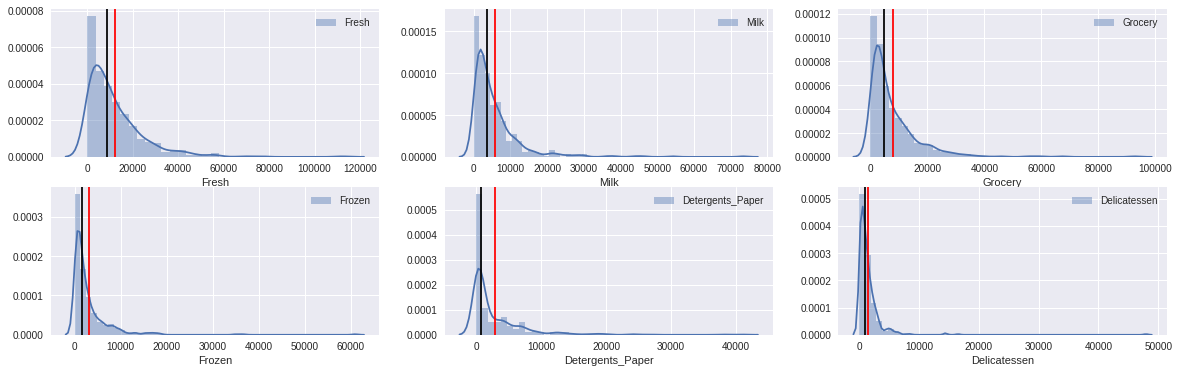

In [152]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(2,3,1+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


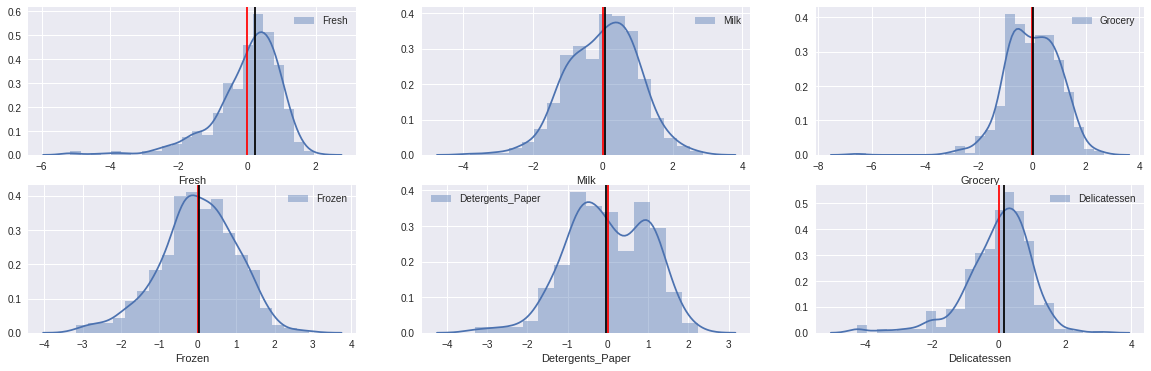

In [153]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_log_sc_df.columns):
    fig.add_subplot(2,3,1+i)
    sns.distplot(customer_log_sc_df[col], label=col)
    plt.axvline(customer_log_sc_df[col].mean(), c='red')
    plt.axvline(customer_log_sc_df[col].median(), c='black')
    plt.legend()

### Deskew by Box-Cox Test

The box cox test works by identifying the optimum power, $\lambda$ to raise the data where

$$\mathbf{x_i}' = \frac{\mathbf{x_i}^\lambda -1}{\lambda}$$

The implementation in Python is

```
y = (x**lmbda - 1) / lmbda, for lmbda > 0
    log(x),                 for lmbda = 0
```

`boxcox` requires the input data to be positive.

In [166]:
customer_box_cox_df = pd.DataFrame()
for col in customer_features.columns:
    box_cox_trans = st.boxcox(customer_features[col])[0]
    customer_box_cox_df[col] = pd.Series(box_cox_trans)

In [168]:
customer_box_cox_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,51.736919,12.670296,16.694343,6.887991,10.154313,15.470232
1,42.989031,12.699553,17.444170,10.638490,10.494584,16.620941
2,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731


In [117]:
scaler.fit(customer_box_cox_df)
customer_box_cox_sc = scaler.transform(customer_box_cox_df)
customer_box_cox_sc_df = pd.DataFrame(customer_box_cox_sc, columns=customer_features.columns)
customer_box_cox_sc_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881


In [118]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    original_box_cox_col_skewtest = st.skewtest(customer_box_cox_df[col])
    scaled_box_cox_col_skewtest = st.skewtest(customer_box_cox_sc_df[col])
    print("""{}
    orig:           {} 
    scaled:         {}
    orig log:       {}
    scaled log:     {}
    orig box-cox:   {}
    scaled box-cox: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest, 
               original_box_cox_col_skewtest,
               scaled_box_cox_col_skewtest))

Fresh
    orig:           SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:         SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41)
    orig log:       SkewtestResult(statistic=-10.321752441398017, pvalue=5.6188111433575958e-25)
    scaled log:     SkewtestResult(statistic=-10.321752441398004, pvalue=5.6188111433582377e-25)
    orig box-cox:   SkewtestResult(statistic=-0.35994737974045543, pvalue=0.71888648448291859)
    scaled box-cox: SkewtestResult(statistic=-0.35994737974044694, pvalue=0.71888648448292491)
    
    
Milk
    orig:           SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:         SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62)
    orig log:       SkewtestResult(statistic=-1.9453289163569336, pvalue=0.051735404015913103)
    scaled log:     SkewtestResult(statistic=-1.9453289163569198, pvalue=0.051735404015914761)
    orig box-cox:   S

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


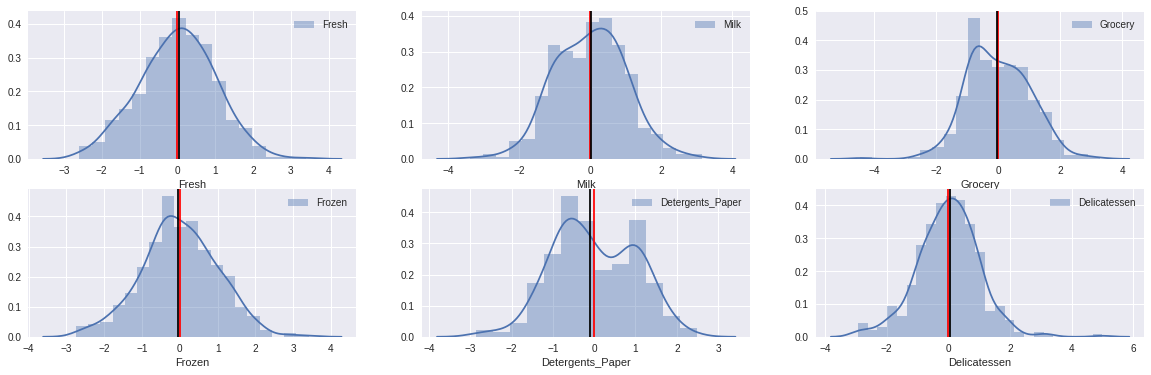

In [119]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_box_cox_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_box_cox_sc_df[col], label=col)
    plt.axvline(customer_box_cox_sc_df[col].mean(), c='red')
    plt.axvline(customer_box_cox_sc_df[col].median(), c='black')
    plt.legend()

## Identifying and Removing Outliers

To identify outliers in the data, we will use what is [the Tukey Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/). 

This means that we will look for points that are more than 1.5 times the Inter-quartile range above the third quartile or below the first quartile.

In [120]:
def display_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - tukey_window
    greater_than_Q3 = dataframe[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe[tukey_mask]

In [121]:
for col in customer_log_sc_df:
    print(col, display_outliers(customer_log_sc_df, col).shape)

Fresh (16, 6)
Milk (4, 6)
Grocery (2, 6)
Frozen (10, 6)
Detergents_Paper (2, 6)
Delicatessen (14, 6)


What if we count the rows that show up as an outlier more than once?

In [122]:
from collections import Counter

In [309]:
raw_outliers = []
for col in customer_log_sc_df:
    outlier_df = display_outliers(customer_log_sc_df, col)
    raw_outliers = raw_outliers + list(outlier_df.index)

display(outlier_df)
display(raw_outliers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,-4.419217,-0.727143,0.421885,-1.665220,0.794247,-2.573276
109,-1.002470,1.484861,1.644448,-0.615434,-0.033357,-4.251391
128,-2.562859,0.895060,-0.172551,-1.828078,0.105835,-4.251391
137,-0.470505,0.811102,0.520827,-0.629456,-0.119445,-2.353561
142,1.210170,0.698153,0.517680,0.548137,-2.204828,-4.251391
154,-1.554127,-3.808515,-3.158292,-2.325583,-2.815523,-3.502289
183,1.206710,2.379109,1.319203,2.497587,-0.761757,3.140996
184,-1.989047,-1.202487,0.014597,-2.336044,-0.567071,-3.259072
187,-0.630153,0.802121,0.673517,1.123840,0.792736,-4.251391
203,-1.597927,-1.473545,-0.661681,-0.896899,0.043449,-2.882947


[65,
 66,
 81,
 95,
 96,
 128,
 171,
 193,
 218,
 304,
 305,
 338,
 353,
 355,
 357,
 412,
 86,
 98,
 154,
 356,
 75,
 154,
 38,
 57,
 65,
 145,
 175,
 264,
 325,
 420,
 429,
 439,
 75,
 161,
 66,
 109,
 128,
 137,
 142,
 154,
 183,
 184,
 187,
 203,
 233,
 285,
 289,
 343]

In [310]:
# raw_outliers = []
# for col in customer_log_sc_df:
#      outlier_df = display_outliers(customer_log_sc_df, col)
#     raw_outliers.append(list(outlier_df.index))

In [313]:
outlier_count = Counter(raw_outliers)
outliers = [k for k,v in outlier_count.items() if v > 1]
#display(outlier_count)
display(outlier_count.items())
display(outliers)

dict_items([(65, 2), (66, 2), (81, 1), (95, 1), (96, 1), (128, 2), (171, 1), (193, 1), (218, 1), (304, 1), (305, 1), (338, 1), (353, 1), (355, 1), (357, 1), (412, 1), (86, 1), (98, 1), (154, 3), (356, 1), (75, 2), (38, 1), (57, 1), (145, 1), (175, 1), (264, 1), (325, 1), (420, 1), (429, 1), (439, 1), (161, 1), (109, 1), (137, 1), (142, 1), (183, 1), (184, 1), (187, 1), (203, 1), (233, 1), (285, 1), (289, 1), (343, 1)])

[65, 66, 128, 154, 75]

In [195]:
outliers

[65, 66, 128, 154, 75]

In [125]:
len(outliers)

5

In [126]:
customer_log_sc_df.shape

(440, 6)

In [127]:
from sklearn.decomposition import PCA

In [314]:
pca = PCA()
pca.fit(customer_box_cox_sc_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Scree Plot

Look for "the bend". This will tell you how many components to keep.

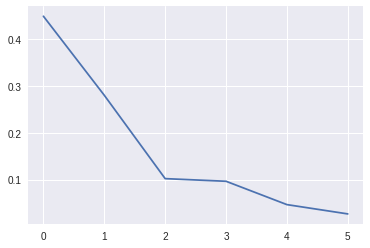

In [315]:
plt.plot(pca.explained_variance_ratio_)

In [316]:
pca.components_

array([[ 0.09173853, -0.54239695, -0.57087861,  0.1219818 , -0.54615975,
        -0.24148947],
       [ 0.59267426,  0.11816848, -0.00874106,  0.59604083, -0.10464898,
         0.51815147],
       [ 0.72578576,  0.02933586,  0.14424062, -0.14603252,  0.18733701,
        -0.62860833],
       [-0.3348604 ,  0.07402752,  0.09729401,  0.7769304 ,  0.16029597,
        -0.49356526],
       [-0.03027079,  0.77376525, -0.11108231, -0.06820724, -0.59101279,
        -0.18461688],
       [-0.02254965, -0.29459877,  0.79461339,  0.01603718, -0.5297849 ,
        -0.01906317]])

In [317]:
display(pca.explained_variance_)
display(pca.explained_variance_ratio_)

array([ 2.69953436,  1.68396678,  0.61278142,  0.57892186,  0.27899034,
        0.15947267])

array([ 0.44889984,  0.28002326,  0.10189812,  0.09626769,  0.04639271,
        0.02651837])

In [318]:
principal_component_loadings = pd.DataFrame(pca.components_, columns=customer_box_cox_sc_df.columns)
principal_component_loadings

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.091739,-0.542397,-0.570879,0.121982,-0.546160,-0.241489
1,0.592674,0.118168,-0.008741,0.596041,-0.104649,0.518151
2,0.725786,0.029336,0.144241,-0.146033,0.187337,-0.628608
3,-0.334860,0.074028,0.097294,0.776930,0.160296,-0.493565
4,-0.030271,0.773765,-0.111082,-0.068207,-0.591013,-0.184617
5,-0.022550,-0.294599,0.794613,0.016037,-0.529785,-0.019063


In [319]:
explained_variance_ratio = pca.explained_variance_ratio_
pca_labels = ['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio)]
pca_labels

['PC 1 // 0.45',
 'PC 2 // 0.28',
 'PC 3 // 0.1',
 'PC 4 // 0.1',
 'PC 5 // 0.05',
 'PC 6 // 0.03']

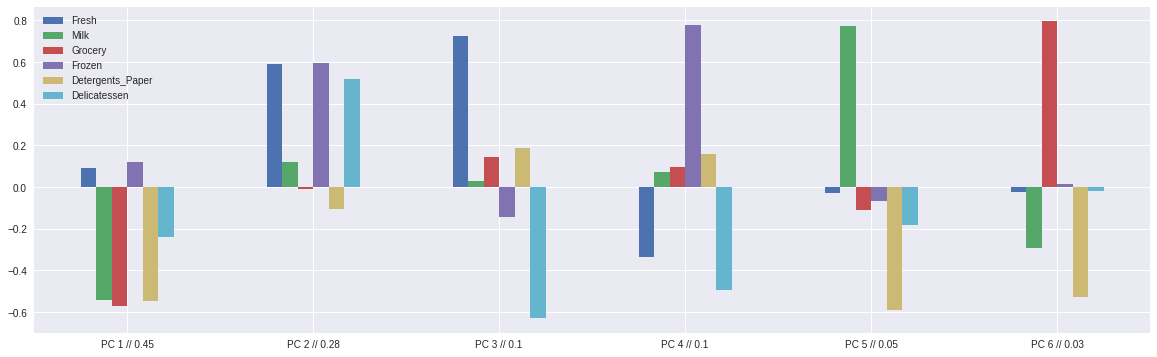

In [320]:
ax = principal_component_loadings.plot(kind='bar', figsize=(20,6), rot=0)
ax.set_xticklabels(pca_labels);

In [321]:
pca = PCA(2)
pca.fit(customer_box_cox_sc_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [322]:
whos DataFrame

Variable                       Type         Data/Info
-----------------------------------------------------
corr                           DataFrame                         Fres<...>essen          1.000000  
customer_box_cox_df            DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]
customer_box_cox_sc_df         DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_feature_z_scores      DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_features              DataFrame         Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
customer_log_df                DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]
customer_log_sc_df             DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_pca_df                DataFrame            Dim 1     Dim 2\n<...>n\n[440 rows x 2 columns]
customer_sc_df                 DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 c

In [323]:
customer_pca_df = pd.DataFrame(pca.transform(customer_box_cox_sc_df), 
                               columns=['Dim 1', 'Dim 2'],
                               index=customer_box_cox_sc_df.index)
sample_pca_df = pd.DataFrame(pca.transform(sample), 
                             columns=['Dim 1', 'Dim 2'],
                             index=sample.index)
display(customer_pca_df.head())
display(sample_pca_df.head())

,Dim 1,Dim 2
0,-1.313524,-0.402012
1,-1.451733,0.326216
2,-1.666275,1.263738
3,0.855733,1.211462
4,-0.854660,1.960276


,Dim 1,Dim 2
265,-20131.999248,14012.453029
78,-778.714440,7805.844792
347,-10840.824860,18688.978929


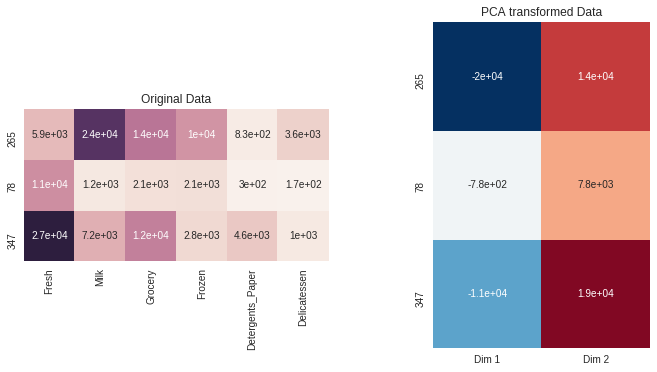

In [324]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title("Original Data")
sns.heatmap(sample, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_df, annot=True, cbar=False, square=True)

In [325]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


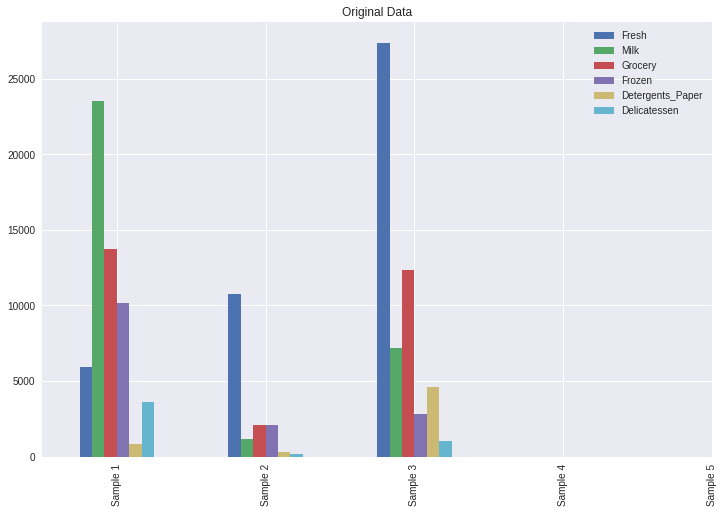

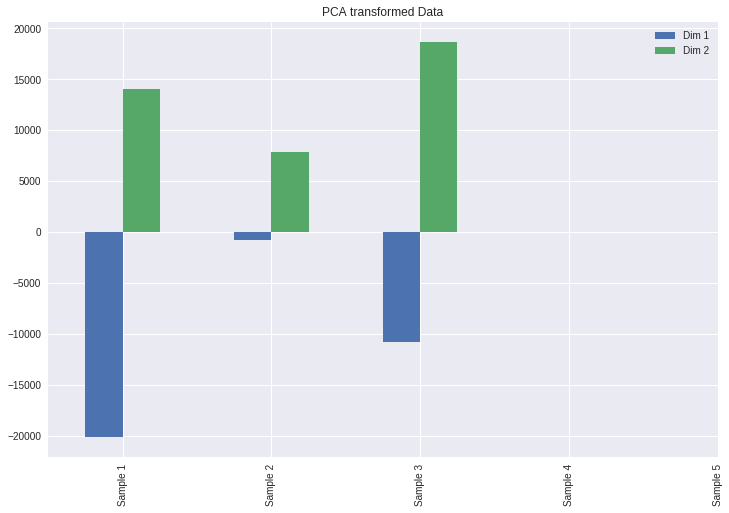

In [326]:
sample.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])